# Balloon game
#### Game conditions
The objective is simple:

Earn as much money as you can by pumping air into a balloon.  
The bigger the balloon gets the more it’s worth, but if you burst it – you get nothing (in the second round, money is taken off your total as a penalty).  

Here are more details on the game: You have 39 rounds in total with a balloon. In each round you can either pump the balloon or cash out (round starts with a balance of 0). For each pump you get +10 cents, but there is a non disclosed limit at which the balloon explodes that you don’t know, if ballon explodes you get 0 at this round. It is not known when the balloon will explode in each round, it can happen literally in any moment (after 1 pump or after 100 pumps).  Objective: you need to finish the game with maximum amount of money retrieved from 39 rounds. 

The game is fundamentally a stochastic process with uncertain rewards. The challenge lies in choosing when to cash out, given that the potential reward increases with each pump, but so does the risk.


#### Thought process on the game

##### Expected value assessment.
Theoretically we should cash out when the expected value of the next pump is less than the current total. However, the challenge is that we don't know the probability of the balloon bursting on the next pump since the burstings are purely random.

##### Related studies:
Lejuez, C.W., Read, J.P., Kahler, C.W., et al. (2002). Evaluation of a behavioral measure of risk-taking: The Balloon Analogue Risk Task (BART). Journal of Experimental Psychology: Applied, 8(2), 75-84.


## Strategy 1 - "fixed pump strategy" where we always cash out after a set number of pumps.
This simulation assumes the risk of the balloon bursting increases by 3% with each pump. You can adjust this value to make the game more or less risky. Why 1%? We do not know the actual increase in risk, so this number is arbitrary and caould be played around. And we will.


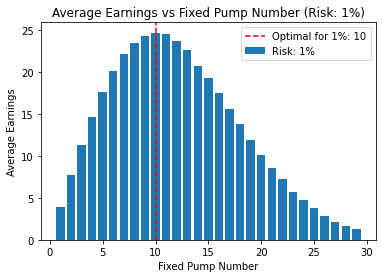

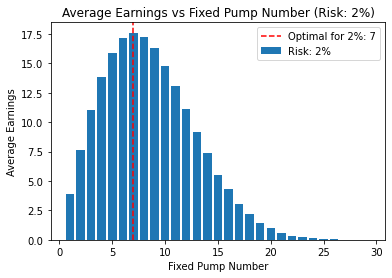

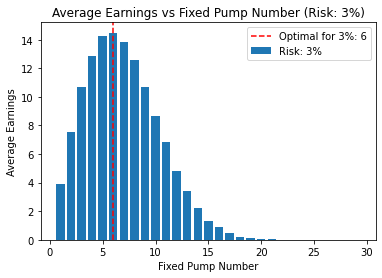

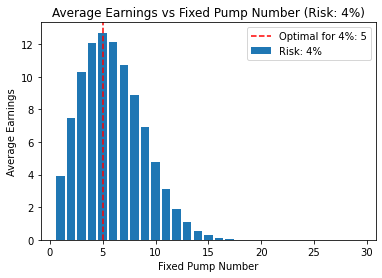

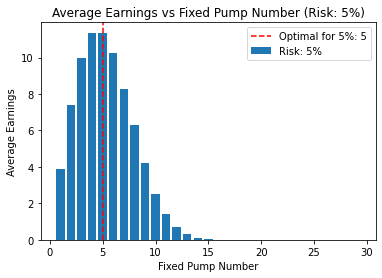

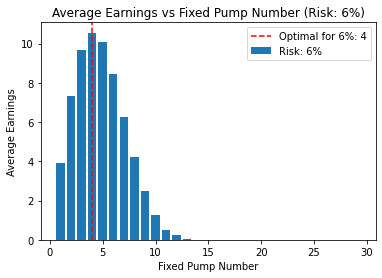

Optimal pumps for each risk probability: {0.01: 10, 0.02: 7, 0.03: 6, 0.04: 5, 0.05: 5, 0.06: 4}


In [1]:
import random
import matplotlib.pyplot as plt

def simulate_balloon_game(max_pumps, risk_prob, rounds=39):  #simulate the 39 rounds game
    total_earnings = 0   #Game starts with 0 earnings.
    for _ in range(rounds):
        earnings_this_round = 0
        for pump in range(max_pumps):
            if random.random() < risk_prob * pump:
                earnings_this_round = 0
                break
            earnings_this_round += 0.10
        total_earnings += earnings_this_round
    return total_earnings

risk_probs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]  # Risk probabilities from 1% to 5%
# This is the crux of the simulation. random.random() generates a random float between 0.0 and 1.0. If this number is less than 0.01 times the current pump number, the balloon is considered to have exploded.
#The choice of 0.01 here is arbitrary and assumes that the risk increases by 1% with each additional pump. The exact value should ideally be based on empirical data or a known probability distribution.


# To store results
optimal_pumps = {}
all_avg_earnings = {}

# Testing different strategies
for risk in risk_probs:
    avg_earnings_for_risk = []
    for pumps in range(1, 30):  # Testing from 1 to 29 pumps
        average_earnings = sum([simulate_balloon_game(pumps, risk) for _ in range(1000)]) / 1000  # Pass the risk_prob to the function
        avg_earnings_for_risk.append(average_earnings)
    optimal_pump_for_risk = avg_earnings_for_risk.index(max(avg_earnings_for_risk)) + 1
    optimal_pumps[risk] = optimal_pump_for_risk
    all_avg_earnings[risk] = avg_earnings_for_risk

    # Plotting
    plt.bar(range(1, 30), avg_earnings_for_risk, label=f"Risk: {risk*100:.0f}%")
    plt.axvline(x=optimal_pump_for_risk, color='r', linestyle='--', label=f"Optimal for {risk*100:.0f}%: {optimal_pump_for_risk}")
    plt.xlabel('Fixed Pump Number')
    plt.ylabel('Average Earnings')
    plt.title(f'Average Earnings vs Fixed Pump Number (Risk: {risk*100:.0f}%)')
    plt.legend()
    plt.show()

print(f"Optimal pumps for each risk probability: {optimal_pumps}")

# Strategy 2 - Diversified (mix riskier and conservative pumps).
It seems that in lower risk setting the optimal number of pumps is around 10-11, while for higher risk it is 4-5. Let's see if deiversification brings anything in here. As we do not know the actual risk of ballon exploding as well as the maximum number of times we can pump it. 

The diversification strategy involves having a mix of both aggressive and conservative approaches. To implement this, we can divide the 39 rounds into two categories: 19 aggressive rounds where we use 10 pumps each, and 20 conservative rounds where we use 5 pumps each.

The code below will show a bar chart comparing the performance of the fixed strategy (10 pumps for all rounds) vs. the diversified strategy (a mix of 10 pumps for 19 rounds and 5 pumps for 20 rounds) across different risk probabilities.

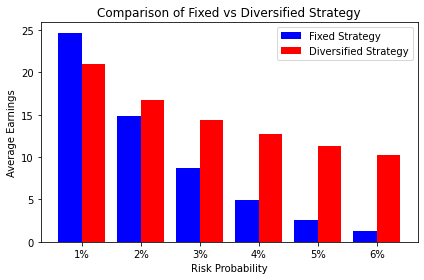

Fixed strategy earnings for each risk probability: {0.01: 24.677999999999997, 0.02: 14.909999999999998, 0.03: 8.720999999999998, 0.04: 4.880999999999999, 0.05: 2.6129999999999995, 0.06: 1.2599999999999998}
Diversified strategy earnings for each risk probability: {0.01: 21.0575, 0.02: 16.754099999999994, 0.03: 14.376000000000003, 0.04: 12.7245, 0.05: 11.2845, 0.06: 10.29680000000002}


In [2]:
def simulate_diversified_strategy(risk_prob, aggr_rounds=19, aggr_pumps=10, cons_rounds=20, cons_pumps=5):
    aggr_pumps = optimal_pumps[risk_prob]  # Get the optimal pumps for the given risk
    aggr_earnings = simulate_balloon_game(aggr_pumps, risk_prob, aggr_rounds)
    cons_earnings = simulate_balloon_game(cons_pumps, risk_prob, cons_rounds)
    return aggr_earnings + cons_earnings

risk_probs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

fixed_strategy_earnings = {}
diversified_earnings = {}

for risk in risk_probs:
    # Fixed strategy
    avg_fixed_earnings = sum([simulate_balloon_game(10, risk) for _ in range(1000)]) / 1000
    fixed_strategy_earnings[risk] = avg_fixed_earnings

    # Diversified strategy
    avg_div_earnings = sum([simulate_diversified_strategy(risk) for _ in range(1000)]) / 1000
    diversified_earnings[risk] = avg_div_earnings

# Plotting
labels = [f"{int(risk*100)}%" for risk in risk_probs]
fixed_vals = list(fixed_strategy_earnings.values())
diversified_vals = list(diversified_earnings.values())

x = range(len(risk_probs))
width = 0.4

plt.bar([i - width/2 for i in x], fixed_vals, width=width, label='Fixed Strategy', color='b')
plt.bar([i + width/2 for i in x], diversified_vals, width=width, label='Diversified Strategy', color='r')

plt.xlabel('Risk Probability')
plt.ylabel('Average Earnings')
plt.title('Comparison of Fixed vs Diversified Strategy')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Fixed strategy earnings for each risk probability: {fixed_strategy_earnings}")
print(f"Diversified strategy earnings for each risk probability: {diversified_earnings}")

## Strategy 3 - Progressive Strategy with Reset
##### Testing a strategy of one person who passed this assessment tests for Optiver for Trading position.
"First 10 rounds 5 pumps only to minimize risk and build capital base.Then 10 pumps. Then once you have capital you take more risk until you lose twice consecutively."

Outline:
1. For the first 10 rounds, play it safe (5 pumps).
2. For the next 10 rounds, do 10 pumps.
3. For each subsequent round, increase the number of pumps by 1.
4. If we lose two consecutive rounds, reset to 10 pumps and repeat the process.
5. We'll first define the function simulate_progressive_strategy for this strategy, then plot the results for strategies 1, 2, and 3 in the same bar chart to compare performance across different risk probabilities.


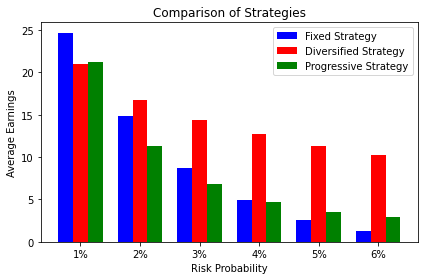

Fixed strategy earnings for each risk probability: {0.01: 24.677999999999997, 0.02: 14.909999999999998, 0.03: 8.720999999999998, 0.04: 4.880999999999999, 0.05: 2.6129999999999995, 0.06: 1.2599999999999998}
Diversified strategy earnings for each risk probability: {0.01: 21.0575, 0.02: 16.754099999999994, 0.03: 14.376000000000003, 0.04: 12.7245, 0.05: 11.2845, 0.06: 10.29680000000002}
Progressive strategy earnings for each risk probability: {0.01: 21.216699999999978, 0.02: 11.331900000000012, 0.03: 6.783900000000005, 0.04: 4.7006, 0.05: 3.552899999999999, 0.06: 2.9486999999999997}


In [3]:
def simulate_progressive_strategy(risk_prob, rounds=39):
    total_earnings = 0
    consecutive_losses = 0
    pumps = 5

    for _ in range(10):  # First 10 rounds - play it safe.
        total_earnings += simulate_balloon_game(pumps, risk_prob, 1)

    pumps = 10
    for _ in range(10, 20):  # Next 10 rounds - 10 pumps.
        round_earning = simulate_balloon_game(pumps, risk_prob, 1)
        total_earnings += round_earning
        if round_earning == 0:  # If we lose
            consecutive_losses += 1
        else:
            consecutive_losses = 0

    for _ in range(20, rounds):  # Progressive increase
        pumps += 1
        round_earning = simulate_balloon_game(pumps, risk_prob, 1)
        total_earnings += round_earning

        if round_earning == 0:  # If we lose
            consecutive_losses += 1
            if consecutive_losses == 2:
                pumps = 10  # Reset to 10 pumps
        else:
            consecutive_losses = 0

    return total_earnings

risk_probs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
progressive_earnings = {}

for risk in risk_probs:
    avg_prog_earnings = sum([simulate_progressive_strategy(risk) for _ in range(1000)]) / 1000
    progressive_earnings[risk] = avg_prog_earnings

# Plotting
labels = [f"{int(risk*100)}%" for risk in risk_probs]
fixed_vals = list(fixed_strategy_earnings.values())
diversified_vals = list(diversified_earnings.values())
prog_vals = list(progressive_earnings.values())

x = range(len(risk_probs))
width = 0.25

plt.bar([i - width for i in x], fixed_vals, width=width, label='Fixed Strategy', color='b')
plt.bar(x, diversified_vals, width=width, label='Diversified Strategy', color='r')
plt.bar([i + width for i in x], prog_vals, width=width, label='Progressive Strategy', color='g')

plt.xlabel('Risk Probability')
plt.ylabel('Average Earnings')
plt.title('Comparison of Strategies')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Fixed strategy earnings for each risk probability: {fixed_strategy_earnings}")
print(f"Diversified strategy earnings for each risk probability: {diversified_earnings}")
print(f"Progressive strategy earnings for each risk probability: {progressive_earnings}")

# Part 2 - Adding penalty and increasing income per pump

# Fixed Strategy

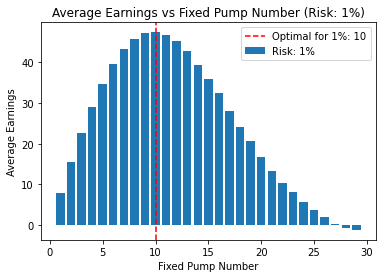

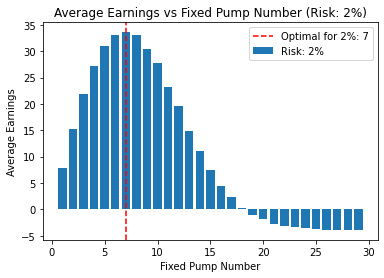

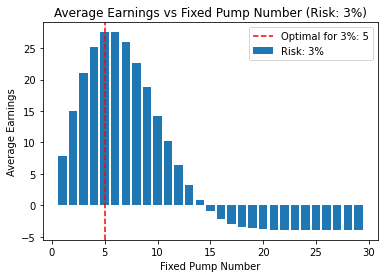

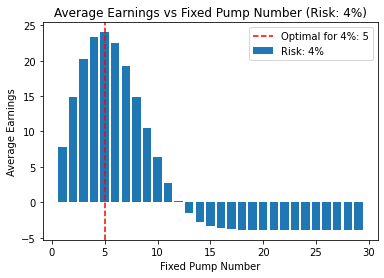

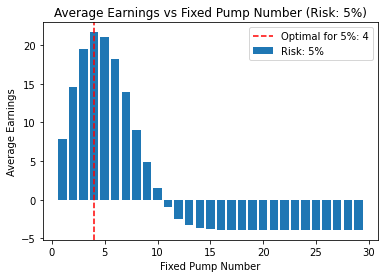

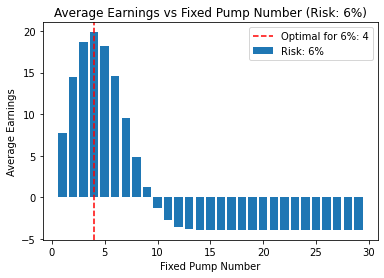

Optimal pumps for each risk probability: {0.01: 10, 0.02: 7, 0.03: 5, 0.04: 5, 0.05: 4, 0.06: 4}


In [4]:

def simulate_balloon_game(max_pumps, risk_prob, rounds=39):  # Simulate the 39 rounds game
    total_earnings = 0   # Game starts with 0 earnings.
    for _ in range(rounds):
        earnings_this_round = 0
        exploded = False
        for pump in range(max_pumps):
            if random.random() < risk_prob * pump:
                earnings_this_round = 0
                exploded = True
                break
            earnings_this_round += 0.20  # Each pump gives 20 cents
        total_earnings += earnings_this_round
        if exploded:  # Apply penalty for explosion
            total_earnings -= 0.10
    return total_earnings

risk_probs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]  # Risk probabilities from 1% to 5%

# To store results
optimal_pumps = {}
all_avg_earnings = {}

# Testing different strategies
for risk in risk_probs:
    avg_earnings_for_risk = []
    for pumps in range(1, 30):  # Testing from 1 to 29 pumps
        average_earnings = sum([simulate_balloon_game(pumps, risk) for _ in range(1000)]) / 1000  # Pass the risk_prob to the function
        avg_earnings_for_risk.append(average_earnings)
    optimal_pump_for_risk = avg_earnings_for_risk.index(max(avg_earnings_for_risk)) + 1
    optimal_pumps[risk] = optimal_pump_for_risk
    all_avg_earnings[risk] = avg_earnings_for_risk

    # Plotting
    plt.bar(range(1, 30), avg_earnings_for_risk, label=f"Risk: {risk*100:.0f}%")
    plt.axvline(x=optimal_pump_for_risk, color='r', linestyle='--', label=f"Optimal for {risk*100:.0f}%: {optimal_pump_for_risk}")
    plt.xlabel('Fixed Pump Number')
    plt.ylabel('Average Earnings')
    plt.title(f'Average Earnings vs Fixed Pump Number (Risk: {risk*100:.0f}%)')
    plt.legend()
    plt.show()

print(f"Optimal pumps for each risk probability: {optimal_pumps}")

## Diversified Strategy

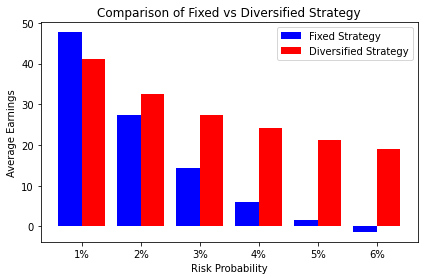

Fixed strategy earnings for each risk probability: {0.01: 47.67389999999995, 0.02: 27.301800000000007, 0.03: 14.367900000000017, 0.04: 6.0015, 0.05: 1.5011999999999999, 0.06: -1.3085999999999993}
Diversified strategy earnings for each risk probability: {0.01: 41.02220000000001, 0.02: 32.4924, 0.03: 27.379599999999996, 0.04: 24.12030000000001, 0.05: 21.276199999999957, 0.06: 19.008100000000027}


In [5]:
def simulate_diversified_strategy(risk_prob, aggr_rounds=19, cons_rounds=20, cons_pumps=5):
    aggr_pumps = optimal_pumps[risk_prob]  # Get the optimal pumps for the given risk
    aggr_earnings = simulate_balloon_game(aggr_pumps, risk_prob, aggr_rounds)
    cons_earnings = simulate_balloon_game(cons_pumps, risk_prob, cons_rounds)
    return aggr_earnings + cons_earnings

risk_probs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]

fixed_strategy_earnings = {}
diversified_earnings = {}

for risk in risk_probs:
    # Fixed strategy
    avg_fixed_earnings = sum([simulate_balloon_game(10, risk) for _ in range(1000)]) / 1000
    fixed_strategy_earnings[risk] = avg_fixed_earnings

    # Diversified strategy
    avg_div_earnings = sum([simulate_diversified_strategy(risk) for _ in range(1000)]) / 1000
    diversified_earnings[risk] = avg_div_earnings

# Plotting
labels = [f"{int(risk*100)}%" for risk in risk_probs]
fixed_vals = list(fixed_strategy_earnings.values())
diversified_vals = list(diversified_earnings.values())

x = range(len(risk_probs))
width = 0.4

plt.bar([i - width/2 for i in x], fixed_vals, width=width, label='Fixed Strategy', color='b')
plt.bar([i + width/2 for i in x], diversified_vals, width=width, label='Diversified Strategy', color='r')

plt.xlabel('Risk Probability')
plt.ylabel('Average Earnings')
plt.title('Comparison of Fixed vs Diversified Strategy')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Fixed strategy earnings for each risk probability: {fixed_strategy_earnings}")
print(f"Diversified strategy earnings for each risk probability: {diversified_earnings}")

## Progressive Strategy

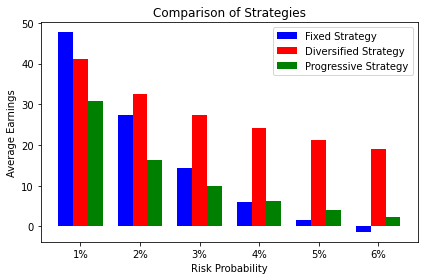

Fixed strategy earnings for each risk probability: {0.01: 47.67389999999995, 0.02: 27.301800000000007, 0.03: 14.367900000000017, 0.04: 6.0015, 0.05: 1.5011999999999999, 0.06: -1.3085999999999993}
Diversified strategy earnings for each risk probability: {0.01: 41.02220000000001, 0.02: 32.4924, 0.03: 27.379599999999996, 0.04: 24.12030000000001, 0.05: 21.276199999999957, 0.06: 19.008100000000027}
Progressive strategy earnings for each risk probability: {0.01: 30.839700000000008, 0.02: 16.252899999999983, 0.03: 9.904599999999991, 0.04: 6.239799999999998, 0.05: 4.063900000000006, 0.06: 2.3105999999999955}


In [6]:
def simulate_progressive_strategy(risk_prob, rounds=39):
    total_earnings = 0
    consecutive_losses = 0
    pumps = 5

    for _ in range(10):  # First 10 rounds - play it safe.
        total_earnings += simulate_balloon_game(pumps, risk_prob, 1)

    pumps = 10
    for _ in range(10, 20):  # Next 10 rounds - 10 pumps.
        round_earning = simulate_balloon_game(pumps, risk_prob, 1)
        total_earnings += round_earning
        if round_earning == 0:  # If we lose
            consecutive_losses += 1
        else:
            consecutive_losses = 0

    for _ in range(20, rounds):  # Progressive increase
        pumps += 1
        round_earning = simulate_balloon_game(pumps, risk_prob, 1)
        total_earnings += round_earning

        if round_earning == 0:  # If we lose
            consecutive_losses += 1
            if consecutive_losses == 2:
                pumps = 10  # Reset to 10 pumps
        else:
            consecutive_losses = 0

    return total_earnings

risk_probs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06]
progressive_earnings = {}

for risk in risk_probs:
    avg_prog_earnings = sum([simulate_progressive_strategy(risk) for _ in range(1000)]) / 1000
    progressive_earnings[risk] = avg_prog_earnings

# Plotting
labels = [f"{int(risk*100)}%" for risk in risk_probs]
fixed_vals = list(fixed_strategy_earnings.values())
diversified_vals = list(diversified_earnings.values())
prog_vals = list(progressive_earnings.values())

x = range(len(risk_probs))
width = 0.25

plt.bar([i - width for i in x], fixed_vals, width=width, label='Fixed Strategy', color='b')
plt.bar(x, diversified_vals, width=width, label='Diversified Strategy', color='r')
plt.bar([i + width for i in x], prog_vals, width=width, label='Progressive Strategy', color='g')

plt.xlabel('Risk Probability')
plt.ylabel('Average Earnings')
plt.title('Comparison of Strategies')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Fixed strategy earnings for each risk probability: {fixed_strategy_earnings}")
print(f"Diversified strategy earnings for each risk probability: {diversified_earnings}")
print(f"Progressive strategy earnings for each risk probability: {progressive_earnings}")